In [0]:
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [0]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import urllib.request
from scipy.io import loadmat

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [0]:
last_percent_reported = None
        
def maybe_download(url, filename, force=False):
  """Download a file if not present, and make sure it's the right size."""
  if force or not os.path.exists(filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, filename)
    print('\nDownload Complete!')
  statinfo = os.stat(filename)
  return filename

train_filename, _ = urllib.request.urlretrieve('http://ufldl.stanford.edu/housenumbers/train_32x32.mat', 'train_32x32.mat')
test_filename, _ = urllib.request.urlretrieve('http://ufldl.stanford.edu/housenumbers/test_32x32.mat', 'test_32x32.mat')

In [0]:
train_filename

'train_32x32.mat'

In [0]:
def maybe_extract(filename, force=False):
    return loadmat(filename)

trainraw = maybe_extract(train_filename)
testraw = maybe_extract(test_filename)

In [0]:
train_images, train_labels, test_images, test_labels = trainraw["X"], trainraw["y"], testraw["X"], testraw["y"]

In [0]:
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

In [0]:
train_images = np.moveaxis(train_images, -1, 0)
test_images  = np.moveaxis(test_images, -1, 0)

In [0]:
train_labels = np.where(train_labels==10, 0, train_labels)
test_labels = np.where(test_labels==10, 0, test_labels)

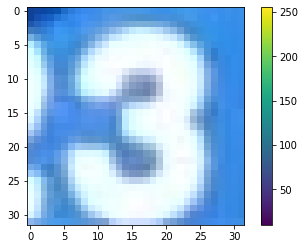

In [0]:
plt.imshow(train_images[3])
plt.colorbar()
# plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


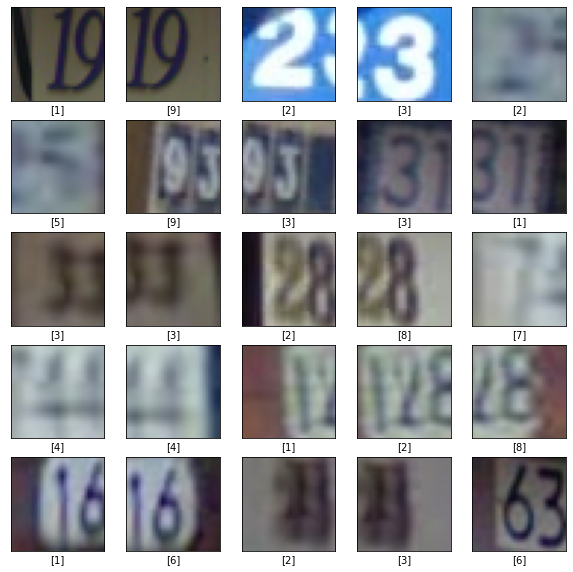

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

In [0]:
# Задание 1.
# Реализуйте глубокую нейронную сеть (полносвязную или сверточную) и обучите ее на синтетических данных (например, наборы MNIST (http://yann.lecun.com/exdb/mnist/) или notMNIST).
# Ознакомьтесь с имеющимися работами по данной тематике: англоязычная статья (http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf), видео на YouTube (https://www.youtube.com/watch?v=vGPI_JvLoN0).

# Задание 2.
# После уточнения модели на синтетических данных попробуйте обучить ее на реальных данных (набор Google Street View). Что изменилось в модели?


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 73257 samples
Epoch 1/10
73257/73257 [==============================] - 114s 2ms/sample - loss: 0.8125 - accuracy: 0.7435
Epoch 2/10
73257/73257 [==============================] - 112s 2ms/sample - loss: 0.4137 - accuracy: 0.8799
Epoch 3/10
73257/73257 [==============================] - 109s 1ms/sample - loss: 0.3491 - accuracy: 0.8979
Epoch 4/10
73257/73257 [==============================] - 110s 1ms/sample - loss: 0.3118 - accuracy: 0.9076
Epoch 5/10
73257/73257 [==============================] - 111s 2ms/sample - loss: 0.2816 - accuracy: 0.9188
Epoch 6/10
73257/73257 [==============================] - 112s 2ms/sample - loss: 0.2581 - accuracy: 0.9238
Epoch 7/10
73257/73257 [==============================] - 112s 2ms/sample - loss: 0.2368 - accuracy: 0.9299
Epoch 8/10
73257/73257 [==============================] - 110s 1ms/sample - loss: 0.2186 - accuracy: 0.9349
Epoch 9/10
73257/73257 [==============================] - 110s 1ms/sample - loss: 0.2029 - accuracy: 0.9386
Epoch

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТочность данной нейронной сети:', test_acc)


26032/1 - 12s - loss: 0.3515 - accuracy: 0.9053

Точность данной нейронной сети: 0.90527046


In [0]:
# arr = np.array()
# np.append(arr, )
# np.set_printoptions(threshold=sys.maxsize)
img = (np.expand_dims(test_images[0],0))
predictions_single = model.predict(img)
np.argmax(predictions_single[0])


5

In [0]:
test_images[0].shape

(32, 32, 3)

In [0]:
tf.saved_model.save(model, '/tmp/keipa/')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/keipa/assets


In [0]:
!zip -r /tmp/keipa.zip /tmp/keipa
from google.colab import files
files.download("/tmp/keipa.zip")

  adding: tmp/keipa/ (stored 0%)
  adding: tmp/keipa/variables/ (stored 0%)
  adding: tmp/keipa/variables/variables.data-00000-of-00001 (deflated 12%)
  adding: tmp/keipa/variables/variables.index (deflated 66%)
  adding: tmp/keipa/assets/ (stored 0%)
  adding: tmp/keipa/saved_model.pb (deflated 89%)


In [0]:
# !pip list
# !pip uninstall tensorflow 
# !pip install tensorflow==2.0.0 

In [0]:
# restore
# newModel = tf.keras.models.load_model('/tmp/keipa/')
# newModel.evaluate(test_images,  test_labels, verbose=2)
# print('\nТочность данной нейронной сети:', test_acc)

Restore part

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import urllib.request
from scipy.io import loadmat

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

def maybe_extract(filename, force=False):
    return loadmat(filename)


model = tf.keras.models.load_model('../model2/')

import argparse
parser = argparse.ArgumentParser()
parser.add_argument('inpath', type=str)
args = parser.parse_args()

def newest(path):
    files = os.listdir(path)
    paths = [os.path.join(path, basename) for basename in files]
    paths = filter(lambda k: '.jpg' in k, paths)
    res = max(paths, key=os.path.getctime)
    print(res)
    return res
    

def resize_image(path):
    import cv2
    im = cv2.imread(path)
    resized_image = cv2.resize(im, (32, 32))
    new_path = path.replace('.jpg', '_small.jpg')
    cv2.imwrite(new_path, resized_image)
    return new_path
	
def convert_to_array(path):
    from PIL import Image
    arr = np.asarray(Image.open(path,'r'))
    return arr/255

img = (np.expand_dims(convert_to_array(resize_image(newest(args.inpath))),0))
predictions_single = model.predict(img)
print(np.argmax(predictions_single[0]))

WebAPI Part

ValuesController.cs

In [0]:
using System;
using System.IO;
using System.Net;
using System.Threading.Tasks;
using Microsoft.AspNetCore.Mvc;
using TensorFlowConnector;

namespace MLApi.Controllers
{
    [Route("/image")]
    public class ValuesController : Controller
    {
        [HttpGet]
        public RedirectResult Get()
        {
            Console.WriteLine("Input");
            return new RedirectResult("/index.html");
        }

        [HttpPost]
        public async Task<IActionResult> Post()
        {
            var filePath = Path.GetTempFileName().Replace(".tmp", ".jpg");
            var t = new TensorFlowConnector.TensorFlowConnector();
            using (var stream = new FileStream(filePath, FileMode.Create))
            {
                await Request.Body.CopyToAsync(stream);
            }
            return new OkObjectResult(new { @class = t.Call(), path = filePath });
        }
    }
}

TensorFlowConnector.cs

In [0]:
using System;
using System.Collections.Generic;
using System.Diagnostics;
using System.IO;

namespace TensorFlowConnector
{
    public class TensorFlowConnector
    {
        private const string WorkDir = "C:\\Users\\keipa\\Desktop\\labs\\bsuir-labs\\12cem\\ml\\lab4\\shell";
        public string Call()
        {
            var output = new List<string>();
            var process = new Process
            {
                StartInfo = new ProcessStartInfo
                {
                    UseShellExecute = false,
                    RedirectStandardOutput = true,
                    WorkingDirectory = WorkDir,
                    FileName = $"{WorkDir}\\GetClass.bat"
                }
            };
            process.Start();
            process.WaitForExit();
            while (process.StandardOutput.Peek() > 0)
            {
                output.Add(process.StandardOutput.ReadLine());
            } 
            return output[output.Count-3];
        }
    }
}


GetClass.bat

In [0]:
C:\Users\keipa\miniconda3\condabin\conda.bat run -n tensorflow python getClass.py C:/Users/keipa/AppData/Local/Temp

Задание 3.
Сделайте множество снимков изображений номеров домов с помощью смартфона на ОС Android. Также можно использовать библиотеки OpenCV, Simple CV или Pygame для обработки изображений с общедоступных камер видеонаблюдения (например, https://www.earthcam.com/).
Пример использования библиотеки TensorFlow на смартфоне можете воспользоваться демонстрационным приложением от Google (https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android).
 

Задание 4.
Реализуйте приложение для ОС Android, которое может распознавать цифры в номерах домов, используя разработанный ранее классификатор. Какова доля правильных классификаций?

![alt text](https://imgur.com/H7bT3aM.jpg)
![alt text](https://imgur.com/kB428xa.jpg)

Доля правильных классификаций 78%